In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}']#, r'\usepackage{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt


mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'
pd.options.display.max_rows = 999

kitgreen = (43/256,135/256,115/256)
uiucblue = (19/255,42/255,76/255)
uiucred = (232/255,74/255,39/255)

<ipython-input-1-208d80ec2269>:5: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}']#, r'\usepackage{newtxmath}']


<IPython.core.display.Javascript object>


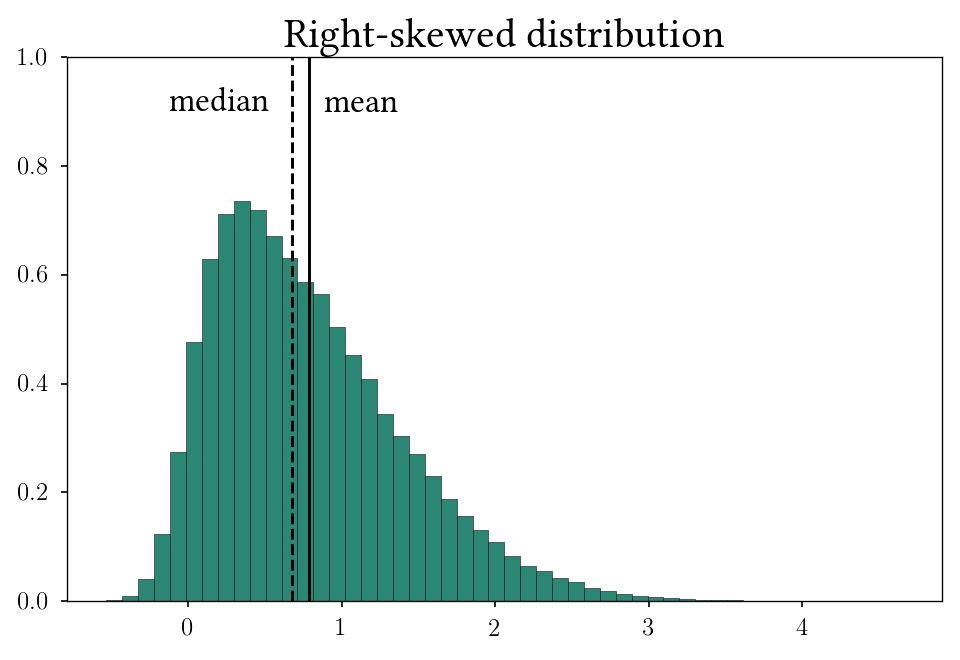

In [9]:
# Adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html
%matplotlib notebook

from scipy.stats import skewnorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

a = 6

# Get the moments
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

r = skewnorm.rvs(a, size=100000)

plt.hist(r, density=True, bins=50, color=kitgreen, edgecolor="black")

plt.vlines(mean, 0, 1, color="black")

plt.vlines(np.median(r), 0, 1, color="black", linestyle="--")

plt.text(np.median(r)-0.8, 0.9, "median", fontsize=20)
plt.text(mean + 0.1 , 0.9, "mean", fontsize=20)

plt.ylim(0,1)
plt.title("Right-skewed distribution")

plt.show()

plt.tight_layout()
plt.savefig("rightskewed.pdf")

<IPython.core.display.Javascript object>


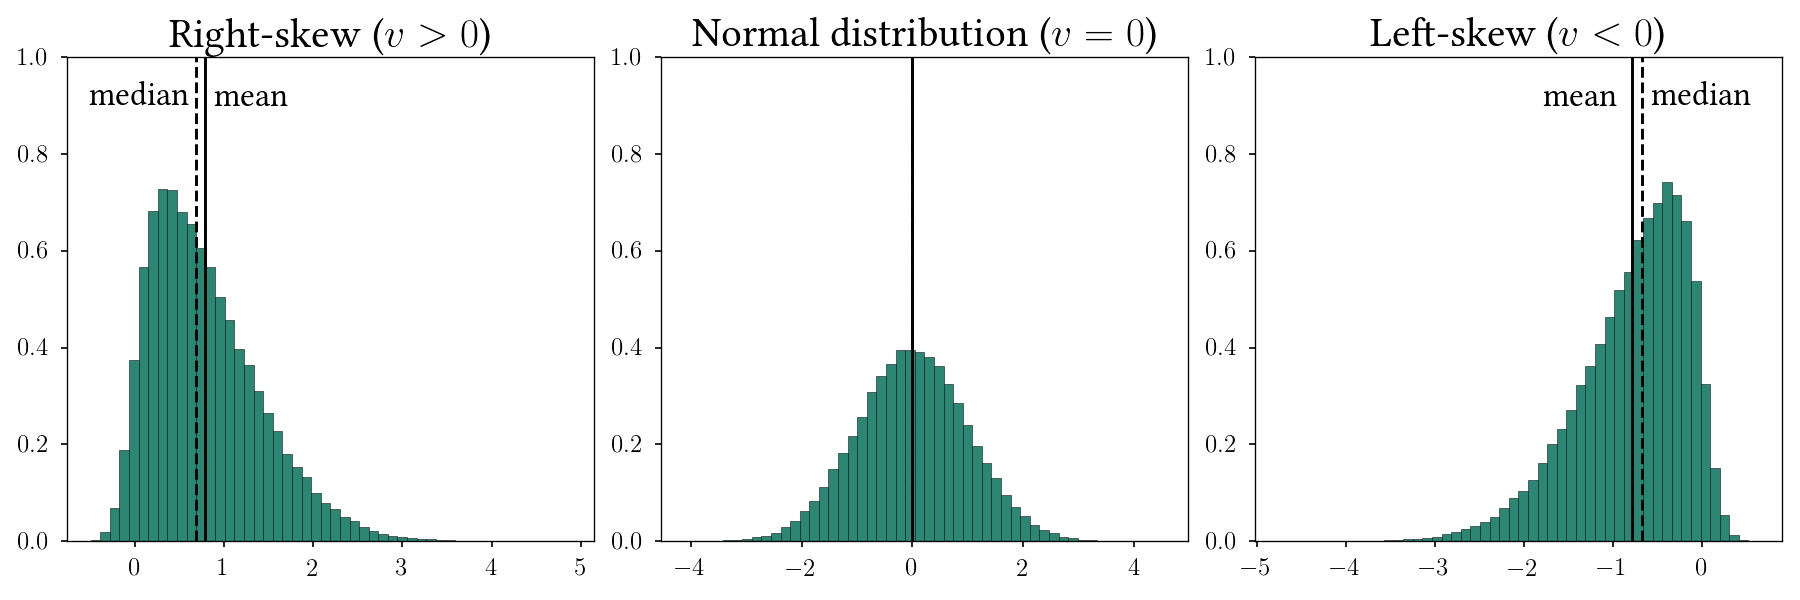

In [69]:
# Adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html
%matplotlib notebook

from scipy.stats import skewnorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(15,5))

plt.sca(ax[0])

a = 6

# Get the moments
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

r = skewnorm.rvs(a, size=100000)

plt.hist(r, density=True, bins=50, color=kitgreen, edgecolor="black")

plt.vlines(mean, 0, 1, color="black")

plt.vlines(np.median(r), 0, 1, color="black", linestyle="--")

plt.text(np.median(r)-1.2, 0.9, "median", fontsize=20)
plt.text(mean + 0.1 , 0.9, "mean", fontsize=20)

plt.ylim(0,1)
plt.title("Right-skew ($v > 0$)")

plt.sca(ax[1])

a = 0

# Get the moments
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

r = skewnorm.rvs(a, size=100000)

plt.hist(r, density=True, bins=50, color=kitgreen, edgecolor="black")

plt.vlines(mean, 0, 1, color="black")

plt.vlines(np.median(r), 0, 1, color="black", linestyle="--")

plt.ylim(0,1)
plt.title("Normal distribution ($v = 0$)")

plt.sca(ax[2])

a = -6

# Get the moments
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

r = skewnorm.rvs(a, size=100000)

plt.hist(r, density=True, bins=50, color=kitgreen, edgecolor="black")

plt.vlines(mean, 0, 1, color="black")

plt.vlines(np.median(r), 0, 1, color="black", linestyle="--")

plt.text(np.median(r)+0.1, 0.9, "median", fontsize=20)
plt.text(mean - 1 , 0.9, "mean", fontsize=20)

plt.ylim(0,1)
plt.title("Left-skew ($v < 0$)")

plt.show()

plt.tight_layout()
plt.savefig("skewed_example.pdf")

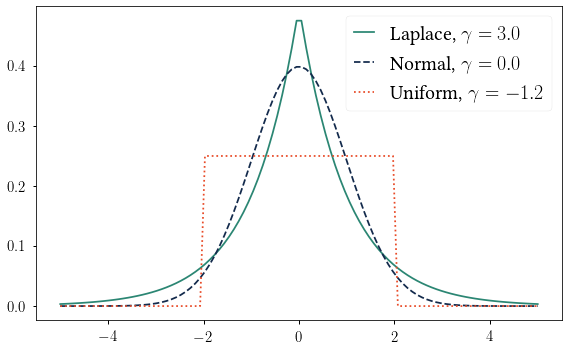

In [3]:
# Adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis

x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(1, 1, figsize=(8,5))

distnames = ['laplace', 'norm', 'uniform']

prettyname = {
    'laplace': "Laplace",
    'norm': "Normal",
    'uniform': "Uniform"
}

colors = {
    'laplace': kitgreen,
    'norm': uiucblue,
    'uniform': uiucred
}

lines = {
    'laplace': "-",
    'norm': "--",
    'uniform': ":"
}

for distname in distnames:

    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)

    data = dist.rvs(size=1000000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, $\gamma = {}$".format(prettyname[distname], round(kur, 1)), 
            c=colors[distname], linestyle=lines[distname])
    ax.legend(fontsize=20, handlelength=1)
    
plt.tight_layout()
plt.savefig("kurtosis_example.pdf")

<IPython.core.display.Javascript object>


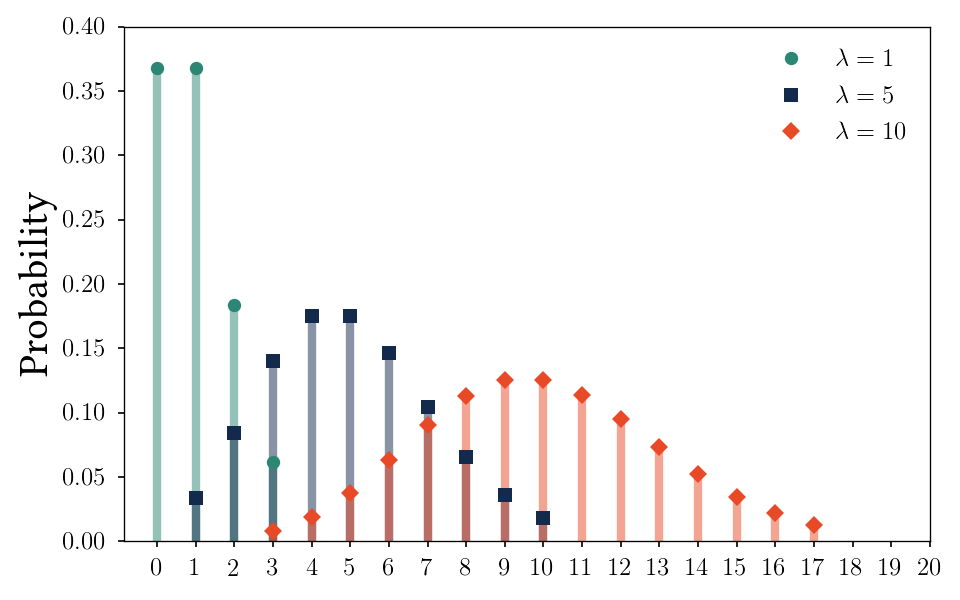

In [14]:
# Adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

%matplotlib notebook

from scipy.stats import poisson


import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8,5))

mu = 1
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='$\lambda = %s$'%mu, color=kitgreen)
ax.vlines(x, 0, poisson.pmf(x, mu), lw=5, alpha=0.5, color=kitgreen)

mu = 5
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bs', ms=8, label='$\lambda = %s$'%mu, color=uiucblue)
ax.vlines(x, 0, poisson.pmf(x, mu), lw=5, alpha=0.5, color=uiucblue)

mu = 10
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bD', ms=8, label='$\lambda = %s$'%mu, color=uiucred)
ax.vlines(x, 0, poisson.pmf(x, mu), lw=5, alpha=0.5, color=uiucred)

ax.legend(loc='best', frameon=False)

plt.ylim((0,0.4))

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.show()

plt.ylabel("Probability")
plt.tight_layout()
plt.savefig("poisson_example.pdf")

<IPython.core.display.Javascript object>


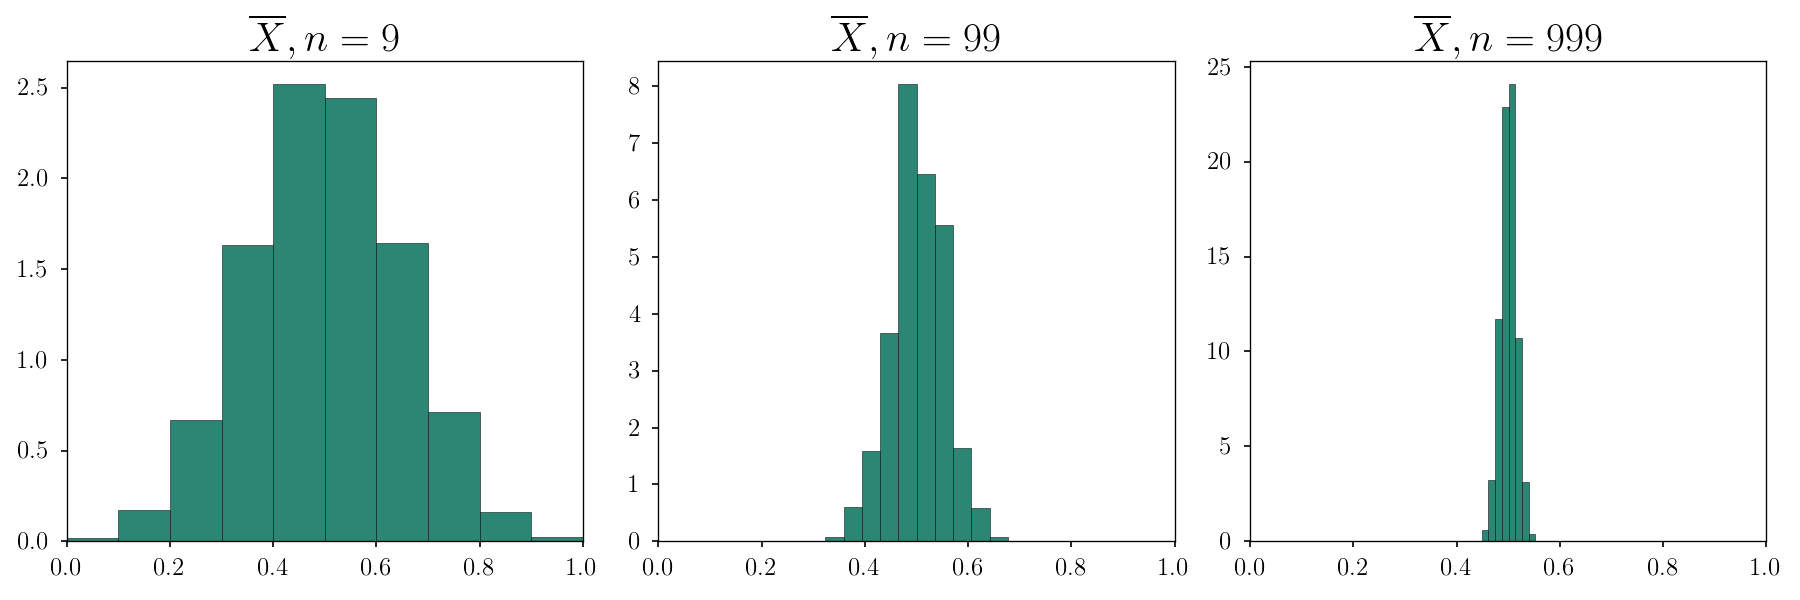

In [70]:
# Adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html
%matplotlib notebook

from scipy.stats import skewnorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(15,5))

plt.sca(ax[0])

p = 0.5
n = 9

res = []
for x in range(10000):
    res = res + [np.random.binomial(n, p)/n]
plt.hist(res, density=True, color=kitgreen, edgecolor="black")

plt.xlim(0,1)
plt.title("$\overline{X}, n=9$")

plt.sca(ax[1])

p = 0.5
n = 99

res = []
for x in range(10000):
    res = res + [np.random.binomial(n, p)/n]
plt.hist(res, density=True, color=kitgreen, edgecolor="black")
plt.xlim(0,1)
plt.title("$\overline{X}, n=99$")

plt.sca(ax[2])


p = 0.5
n = 999

res = []
for x in range(10000):
    res = res + [np.random.binomial(n, p)/n]
plt.hist(res, density=True, color=kitgreen, edgecolor="black")
plt.xlim(0,1)
plt.title("$\overline{X}, n=999$")


plt.show()

plt.tight_layout()
plt.savefig("example_hoeffding.pdf")

<IPython.core.display.Javascript object>


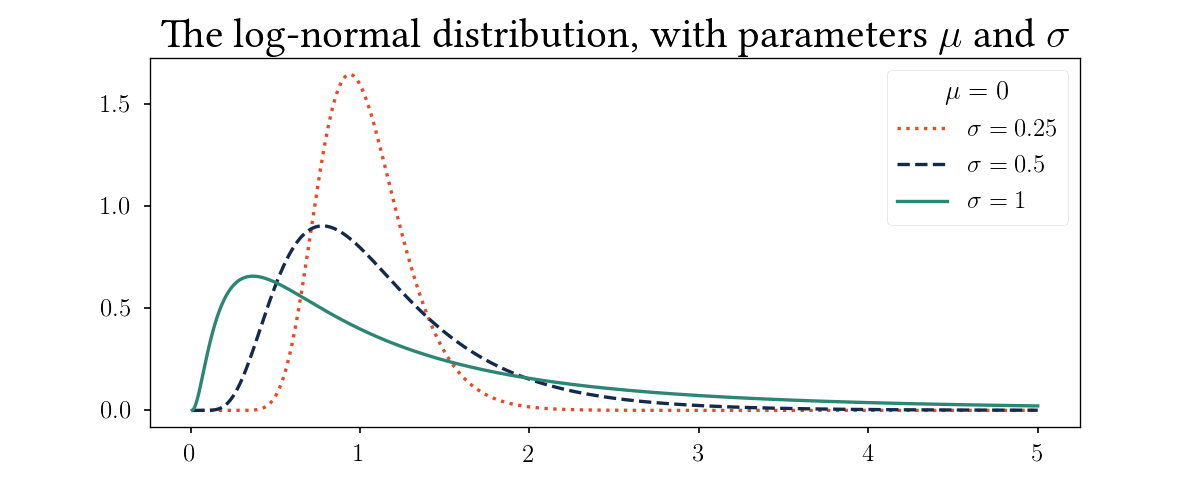

In [196]:
%matplotlib notebook

import scipy 

fig, ax = plt.subplots(1, 1, figsize=(10,4))


mu, sigma = 0, 0.25 # mean and standard deviation
x = np.linspace(0.01, 5, 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color=uiucred, linestyle=":", label="$\sigma=%s$"%sigma)

mu, sigma = 0, 0.5 # mean and standard deviation
x = np.linspace(0.01, 5, 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color=uiucblue, linestyle="--", label="$\sigma=%s$"%sigma)

mu, sigma = 0, 1 # mean and standard deviation
x = np.linspace(0.01, 5, 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color=kitgreen, label="$\sigma=%s$"%sigma)

#plt.vlines(1, 0, 1.7, color="black", linestyle=":")

lg = plt.legend(title="$\mu = 0$")
lg.get_title().set_fontsize(16)

#plt.text(1.2, 1.5, "median = $e^\mu$", fontsize=16)

plt.title("The log-normal distribution, with parameters $\mu$ and $\sigma$")

plt.savefig("lognormal_example_1.pdf")

<IPython.core.display.Javascript object>


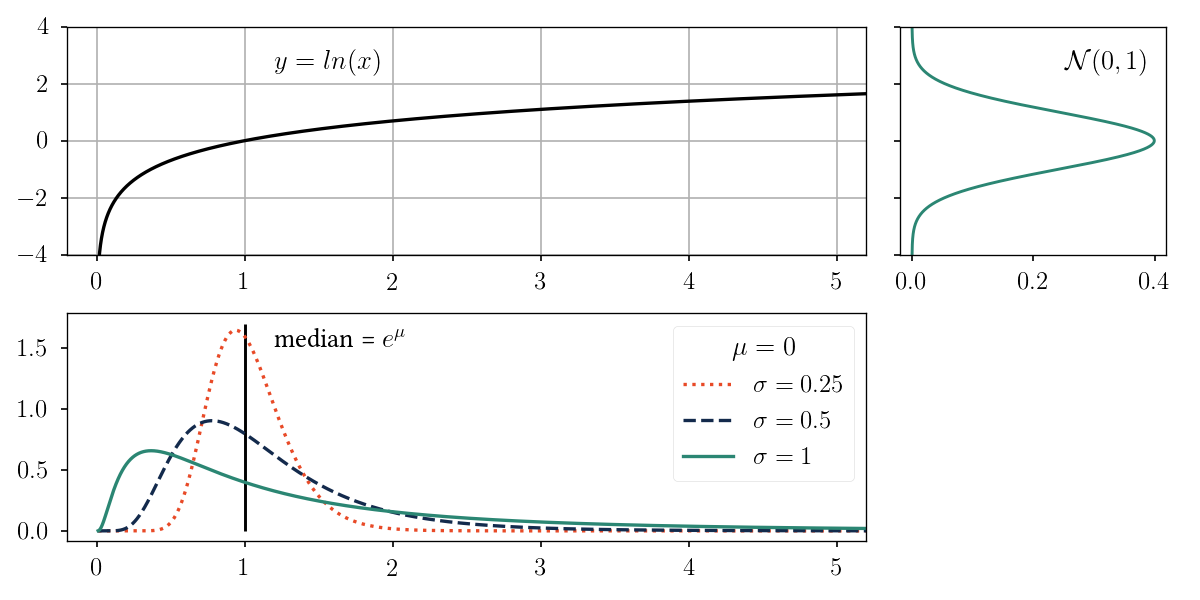

In [197]:
%matplotlib notebook

import scipy 

fig, ax = plt.subplots(2, 2, figsize=(10,5), sharey="row", gridspec_kw={'width_ratios': [3, 1]})

plt.sca(ax[1][0])

mu, sigma = 0, 0.25 # mean and standard deviation
x = np.linspace(0.01, 6, 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color=uiucred, label="$\sigma=%s$"%sigma, linestyle=":")

mu, sigma = 0, 0.5 # mean and standard deviation
x = np.linspace(0.01, 6, 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color=uiucblue, label="$\sigma=%s$"%sigma, linestyle="--")

mu, sigma = 0, 1 # mean and standard deviation
x = np.linspace(0.01, 6, 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color=kitgreen, label="$\sigma=%s$"%sigma)

plt.vlines(1, 0, 1.7, color="black")

lg = plt.legend(title="$\mu = 0$")
lg.get_title().set_fontsize(16)

plt.text(1.2, 1.5, "median = $e^\mu$", fontsize=16)
plt.xlim(-0.2, 5.2)

plt.sca(ax[0][0])
pdflog = np.log(x)
plt.plot(x, pdflog, linewidth=2, color="black")
plt.ylim(-4,4)
plt.xlim(-0.2, 5.2)
plt.grid(axis="both")

plt.text(1.2, 2.5, "$y = ln(x)$", fontsize=16)

plt.sca(ax[0][1])

x = np.linspace(-4, 4, 10000)

pdfnorm = scipy.stats.norm.pdf(x)

df = pd.DataFrame({'y': pdfnorm, 'x': x})
df.plot(x='y', ax=ax[0][1], label="", legend=None, color=kitgreen)
cax = plt.gca()
cax.set_xlabel("")
cax.legend = None

plt.text(0.25, 2.5, "$\mathcal{N}(0,1)$", fontsize=16)

plt.tight_layout()

ax[1][1].axis('off')

plt.savefig("lognormal_example_2.pdf")
